# Assignment 2 - Machine Learning Basics

## *Yujing Ke*
Netid:  *yk175*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(a) Flexible method performs better. When n is large and p is small, we want to avoid underfitting and reduce bias. Since we have a large sample size, flexible method will be very unlikely to cause overfitting. 

(b) Inflexsible method performs better. When p is large and n is small, we want to avoid overfitting, therefore inflexible method works better.

(c) Flexsible method performs better. Inflexsible works better when the predictors and response is highly linear. On the contrary, when the linearity between predictors and response is low, we want to adopt flexsible method to avoid underfitting.

(d) Inflexsible method performs better. When variance of error terms is high, it means that we have a lot of noise in our data. In this case, we want to adopt inflexible method. Because unlike inflexible method, flexible method is less likely to be influenced by the noise which will lead to overfitting.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) 

(i) It is a regression problem because we are not making categorical prediction, but instead we are finding out how predictors (profit, number of employees, industry) influence the responses (CEO salary).

(ii) We are interested in inference. 

(iii) n = 500; p = 3


(b) 

(i) It is a classification problem because we are trying to find out which category the product might fall into, success or failure.

(ii) We are interested in prediction. 

(iii) n = 20; p = 13


(c) 

(i) It is a regression problem because we are finding out the relationship between the % change in the US dollar and the weekly changes in the world stock markets. 

(ii) We are interested in prediction. 

(iii) n = 52; p = 3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [447]:
# (a) Write your own kNN classifier
import numpy
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.k = 5
        self.x_fit = []
        self.y_fit = []
    
    def fit(self, x, y): 
        # Save the training data to properties of this class
        self.x_fit = np.asarray(x)
        self.y_fit = np.asarray(y)
        
    def predict(self, x, k):
        self.k = k
        y_hat = [] # Variable to store the estimated class label for 
        
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            dist = np.sum(np.power((self.x_fit - x[i]),2),axis = 1) # compute sum of squared differences
            sorted_dist = np.sort(dist, axis = 0)[:k] # find nearest neihbors over X_train  
            sorted_index = np.argsort(dist,axis = 0)[:k] # keep nearest K data points
            
            if sum(self.y_fit[sorted_index])> k/2:
                y_hat.append(1)
            else:
                y_hat.append(0)   
 
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy



In [448]:
# (b) Load the datasets to be evaluated here.
import pandas as pd
x_high_test = pd.read_csv('./data/A1_X_test_high.csv',header=None)
x_high_test = x_high_test.values
x_low_test = pd.read_csv('./data/A1_X_test_low.csv',header=None)
x_low_test = x_low_test.values
y_high_test = pd.read_csv('./data/A1_Y_test_high.csv',header=None)
y_high_test = y_high_test.values
y_high_test = y_high_test.reshape((1000,)) 
y_low_test = pd.read_csv('./data/A1_Y_test_low.csv',header=None)
y_low_test = y_low_test.values
y_low_test = y_low_test.reshape((1000,))

x_high_train = pd.read_csv('./data/A1_X_train_high.csv',header=None)
x_high_train = x_high_train.values
x_low_train = pd.read_csv('./data/A1_X_train_low.csv',header=None)
x_low_train = x_low_train.values
y_high_train = pd.read_csv('./data/A1_Y_train_high.csv',header=None)
y_high_train = y_high_train.values
y_high_train = y_high_train.reshape((1000,)) 
y_low_train = pd.read_csv('./data/A1_Y_train_low.csv',header=None)
y_low_train = y_low_train.values
y_low_train = y_low_train.reshape((1000,)) 


In [449]:
%%timeit -n 1 -r 1 
# (c) Train classifier on first the low dimensional dataset and then the high dimensional dataset with  k=5
import time
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
# this is LOW diensional
low = Knn()
low.fit(x_low_train,y_low_train)
print("The accuracy of low dimensional dataset with k = 5 is",accuracy(y_low_test,low.predict(x_low_test,5)))

The accuracy of low dimensional dataset with k = 5 is 0.925
243 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [450]:
%%timeit -n 1 -r 1
# this HIGH diensional
high = Knn()
high.fit(x_high_train,y_high_train)
# high.predict(y_high_test,5)
print("The accuracy of high dimensional dataset with k = 5 is",accuracy(y_high_test,high.predict(x_high_test,5)))

The accuracy of high dimensional dataset with k = 5 is 0.993
4.93 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


(d) Compare your implementation's accuracy and computation time to the scikit learn KNeighborsClassifier class.

The accuracy of my implementation is 0.925 and 0.993 respectively.

The accuracy of scikit learn KNeighborsClassifier is 0.925 and 0.993 respectively as well.

Therefore the accuracy is equal. 


The result below might vary because each time we might get a slightly different result.

The computation time of my implementation is 270 ms and 5.05 s respectively.

The computation time of my implementation is 11.9 ms and 223 ms respectively.

My implementation is 22.7 and 22.6 times slower respectively.



In [200]:
%%timeit -n 1 -r 1
# (d) Compare your implementation's accuracy and computation time to the scikit learn KNeighborsClassifier class. 
# Evaluate the performance of the scikit learn kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
from sklearn.neighbors import KNeighborsClassifier
import time

def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

## this is LOW dimension
low_train = KNeighborsClassifier(n_neighbors=5)
low_train.fit(x_low_train, y_low_train) 
print("The accuracy of low dimensional dataset with k = 5 is",accuracy(y_low_test,low_train.predict(x_low_test)))



The accuracy of low dimensional dataset with k = 5 is 0.925
11.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [201]:
%%timeit -n 1 -r 1
## this is HIGH dimension
high_train = KNeighborsClassifier(n_neighbors=5)
high_train.fit(x_high_train, y_high_train) 
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy
print("The accuracy of high dimensional dataset with k = 5 is",accuracy(y_high_test,high_train.predict(x_high_test)))

The accuracy of high dimensional dataset with k = 5 is 0.993
223 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


(e)
The drawbacks of the prediction process being slow are:
- The process of tuning parameters might be slow in this case, therefore it could be more difficult to find the optimal parameters.
- When data is very large in size, the computation time could be too long.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [126]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

In [129]:
def get_distance(v1, v2):
        points = zip(v1, v2)
        diffs_squared_distance = [(a - b)*(a - b) for (a, b) in points]
        return math.sqrt(sum(diffs_squared_distance))
E1 = get_distance([0,0,0],X[0])
print(E1)
E2 = get_distance([0,0,0],X[1])
print(E2)
E3 = get_distance([0,0,0],X[2])
print(E3)
E4 = get_distance([0,0,0],X[3])
print(E4)
E5 = get_distance([0,0,0],X[4])
print(E5)
E6 = get_distance([0,0,0],X[5])
print(E6)


3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


**ANSWER**:

(a)
*Table 2. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$ and the Euclidean distance between each observation and the test point.*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | Distances  |
|------|-------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |  3.0  |
| **2**| 2     | 0     | 0     | Red   |  2.0  |
| **3**| 0     | 1     | 3     | Red   |  3.16  |
| **4**| 0     | 1     | 2     | Blue  |  2.24  |
| **5**| -1    | 0     | 1     | Blue  |  1.41  |
| **6**| 1     | 1     | 1     | Red   |  1.73  |

(b) 

Our prediction with K=1 is the test point is blue.
When k = 1, the nearest neighbor is Obs.#5, therefore the test point is categorized into class "Blue".

(c) 

Our prediction with K=3 is the test point is red.
When k = 3, the nearest neighbor is Obs.#5, Obs.#6, and Obs.#2. Out of three points, two of them are in the red category. Therefore the test point is categorized into class "Red".

(d)
If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be small.
The reason is that when the linearity between predictors and response is low, we want to adopt flexsible method to avoid underfitting.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=1` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 5, 25\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

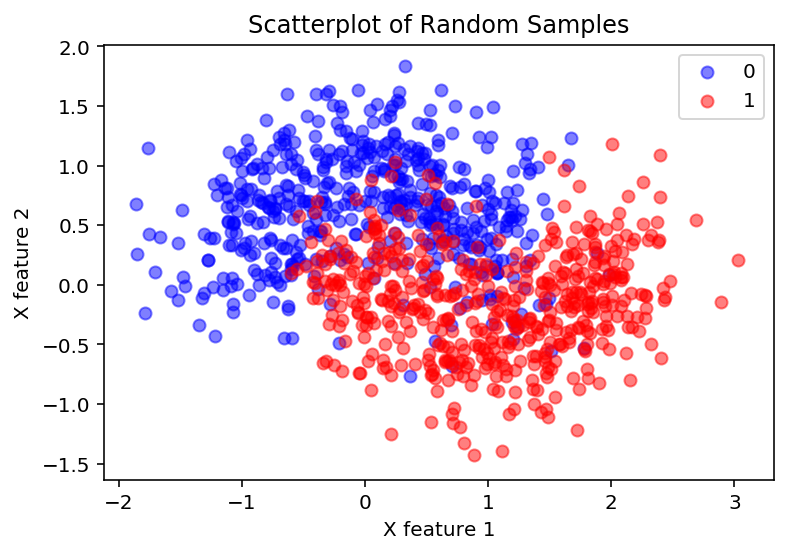

In [451]:
%config InlineBackend.figure_format = 'retina'

# (a) and (b)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

x_tr, y_tr = datasets.make_moons(n_samples = 1000, noise = 0.35)

x_tr = np.asarray(x_tr)
y_tr = np.asarray(y_tr)
plt.scatter(x_tr[y_tr == 0][:,0], x_tr[y_tr == 0][:,1], c="b",alpha = .5,label = '0')
plt.scatter(x_tr[y_tr == 1][:,0], x_tr[y_tr == 1][:,1], c="r",alpha = .5,label = '1')
plt.xlabel('X feature 1')
plt.ylabel('X feature 2')
plt.title("Scatterplot of Random Samples")
plt.legend()
plt.show()


In [290]:
import random
import numpy as np
# (c) Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. 
# For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with:  k={1,5,25}
# This will result in 9 combinations (3 datasets, with 3 trained classifiers).
rn = [x for x in range(1000)]
np.random.shuffle(rn)
x_tr_rd = x_tr[rn]
y_tr_rd = y_tr[rn]

xtr_list = []
ytr_list = []

xtr_list.append(x_tr_rd[:100])
ytr_list.append(y_tr_rd[:100])

xtr_list.append(x_tr_rd[400:500])
ytr_list.append(y_tr_rd[400:500])

xtr_list.append(x_tr_rd[800:900])
ytr_list.append(y_tr_rd[800:900])
# xtr_list[0]


from sklearn.neighbors import KNeighborsClassifier
classifier_list = []

g1_1 = KNeighborsClassifier(n_neighbors=1)
g1_1.fit(g1_x, g1_y) 
classifier_list.append(g1_1)

g1_25 = KNeighborsClassifier(n_neighbors=25)
g1_25.fit(g1_x, g1_y) 
classifier_list.append(g1_25)

g1_50 = KNeighborsClassifier(n_neighbors=50)
g1_50.fit(g1_x, g1_y) 
classifier_list.append(g1_50)

g2_1 = KNeighborsClassifier(n_neighbors=1)
g2_1.fit(g2_x, g2_y) 
classifier_list.append(g2_1)

g2_25 = KNeighborsClassifier(n_neighbors=25)
g2_25.fit(g2_x, g2_y) 
classifier_list.append(g2_25)

g2_50 = KNeighborsClassifier(n_neighbors=50)
g2_50.fit(g2_x, g2_y) 
classifier_list.append(g2_50)

g3_1 = KNeighborsClassifier(n_neighbors=1)
g3_1.fit(g3_x, g3_y) 
classifier_list.append(g3_1)

g3_25 = KNeighborsClassifier(n_neighbors=25)
g3_25.fit(g3_x, g3_y) 
classifier_list.append(g3_25)

g3_50 = KNeighborsClassifier(n_neighbors=50)
g3_50.fit(g3_x, g3_y) 
classifier_list.append(g3_50)


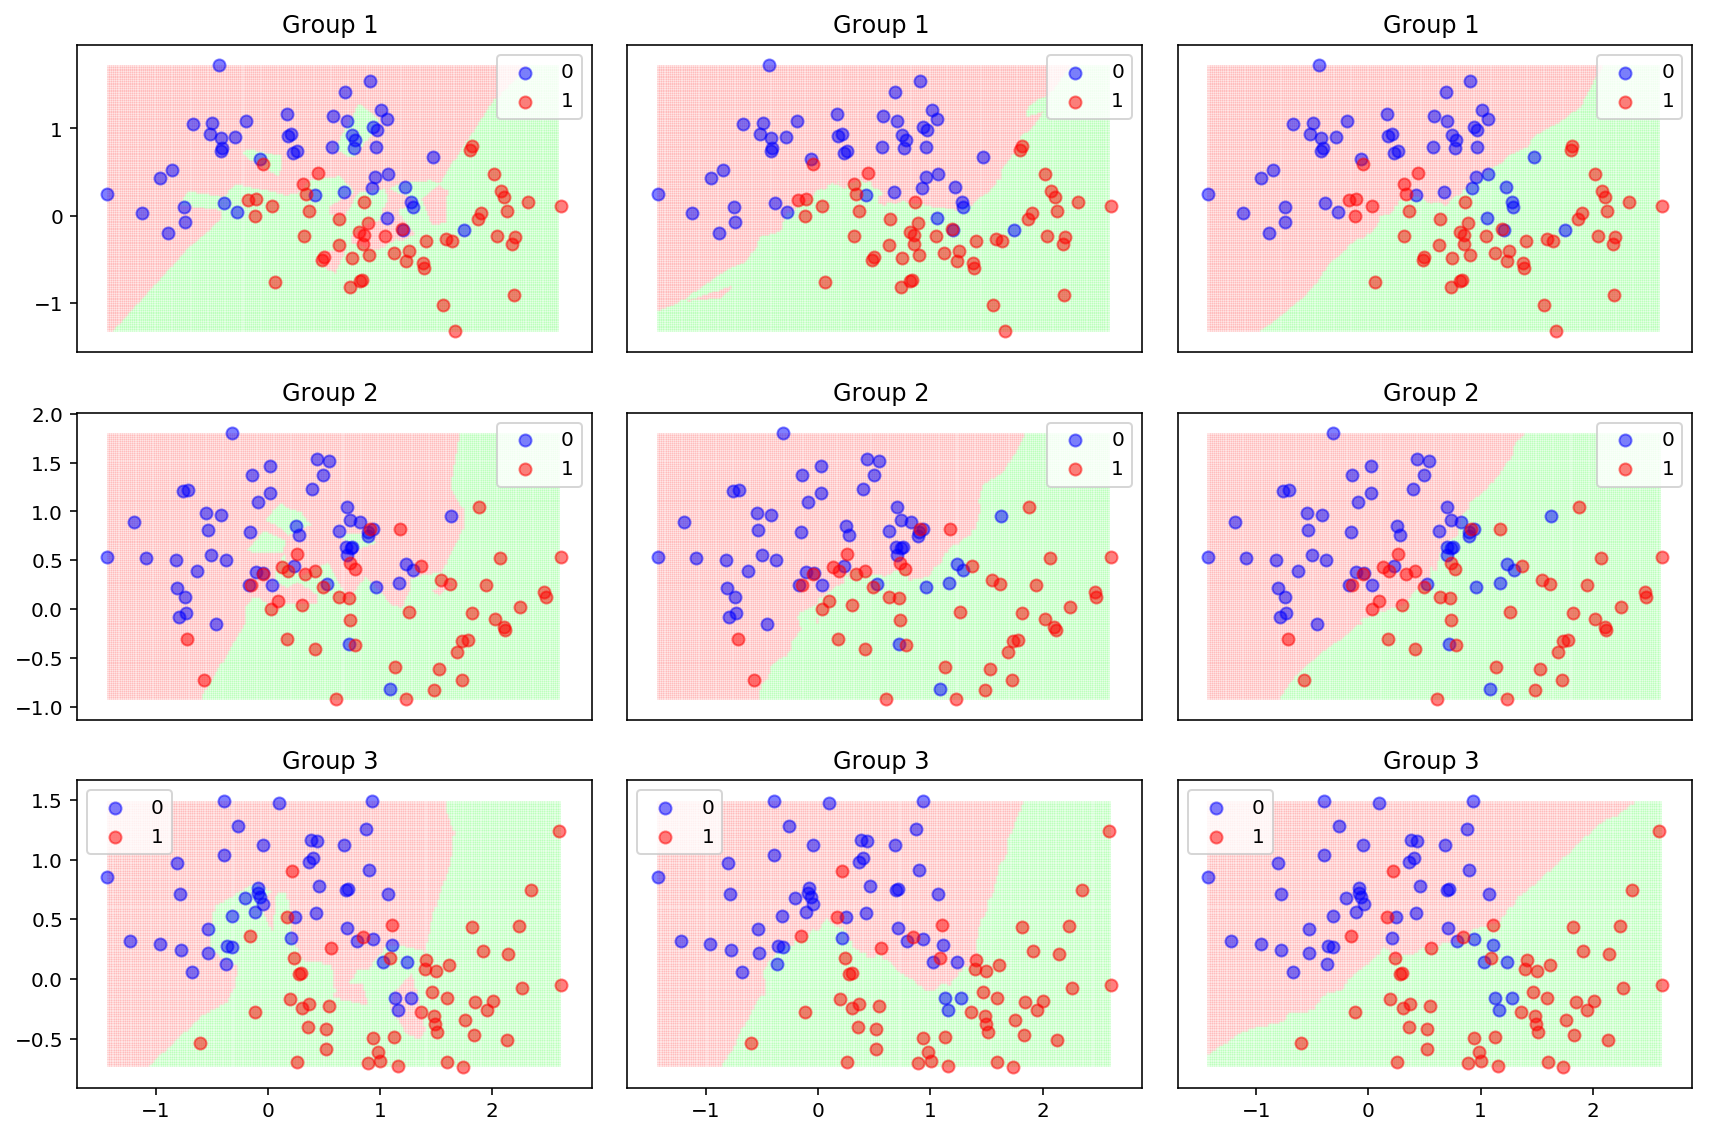

In [446]:
# (d) For each combination of dataset trained classifier, in a 3-by-3 grid, 
# plot the decision boundary (similar in style to Figure 2.15 from Introduction to Statistical Learning). 
# Each column should represent a different value of  k
# and each row should represent a different dataset.
plt.figure(figsize=(12, 8))
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh
cmap_light = ListedColormap([ '#FFAAAA', '#AAFFAA'])
for i in range(9):
    j = int(i/3)
    k = i%3
    data1 = xtr_list[j][ytr_list[j] == 0]
    data2 = xtr_list[j][ytr_list[j] == 1]
    plt.subplot(331+i)
    
    xmin = np.amin(xtr_list[j][:, 0])
    xmax = np.amax(xtr_list[j][:, 0])
    ymin = np.amin(xtr_list[j][:, 1])
    ymax = np.amax(xtr_list[j][:, 1])

#     xmin,xmax = .min , xtr_list[j][:, 0].max 
#     ymin,ymax = xtr_list[j][:, 1].min , xtr_list[j][:, 1].max 
#     print(xmin,xmax,ymin,ymax)
    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),np.arange(ymin, ymax, h))
    Z = classifier_list[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,alpha = .3)
    plt.scatter(data1[:,0], data1[:,1],c = 'b',alpha = .5 ,label = '0')
    plt.scatter(data2[:,0], data2[:,1],c = 'r',alpha = .5,label = '1')
    plt.legend()
    plt.title("Group %d " %(j+1))
    if i < 6:
        plt.xticks([], [])
    if i%3 != 0:
        plt.yticks([], [])
plt.tight_layout()
# plt.title("Combination of Dataset Trained Classifier")
plt.show()




(e) What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

The difference between the rows are not so visible to me, except rhe data points are slightly different and resulting in slightly different decision boundaries.

The difference between the columns are that the first column has the most non-linear decision boundary, while the second column has the best accuracy for decision boundary, while the third column has the simplist decision boundary which is almost like a straight line in each subplot.

I think for group 1 and group 3, when k = 25, the decision boundaries appear to best separate the two classes of data.

The decision boundary for k = 1 varies the most as the data change from group1 to group 2 and group 3.



(f) Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

In this exercise, I can see that when k has lower value, such as k = 1, the model will have higher variance. 

On the contrary, when k has higher value, such as k = 50, the model will have higher bias. 

If k is something in between, the model will have a better balance between bias and variance. 

The bias-variance tradeoff, in my understanding, is that if we need to have a satisfactory balance between bias and variance, we should not adopt extrem k values such as k = 1 or k = 50. Otherwise, we may have either high bias or high variance, so this is the tradeoff that shown in this example.


## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [410]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#(a) Using the function created earlier to generate random samples 
# create a new set of 1000 random samples

x_te, y_te = datasets.make_moons(n_samples = 1000, noise = 0.35)
x_te = np.asarray(x_te)
y_te = np.asarray(y_te)

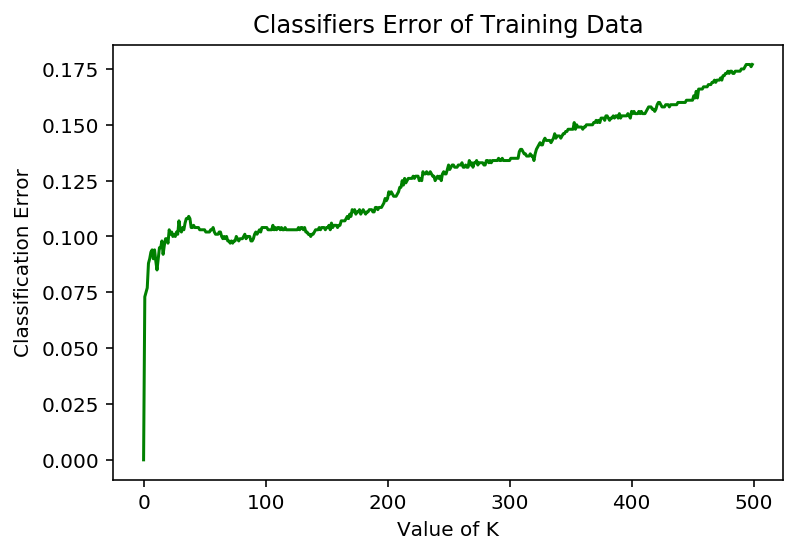

In [418]:
clf_err_tr = []

for k in range(1,501):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_tr, y_tr) 
    y_hat_tr = knc.predict(x_tr)
    clf_err_tr.append(1 - accuracy_score(y_tr, y_hat_tr))

plt.plot(clf_err_tr,c = 'g')
plt.xlabel('Value of K')
plt.ylabel('Classification Error')
plt.title("Classifiers Error of Training Data")
plt.show()    

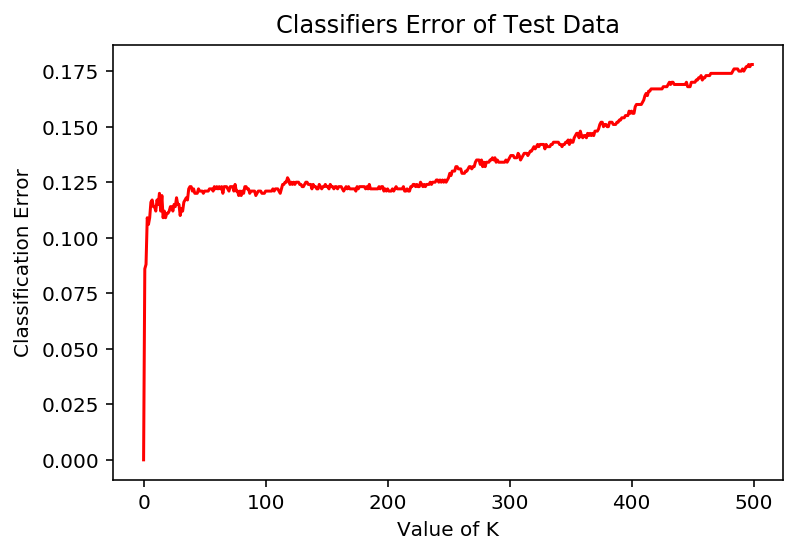

In [420]:
clf_err_te = []

for k in range(1,501):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_te, y_te) 
    y_hat_te = knc.predict(x_te)
    clf_err_te.append(1 - accuracy_score(y_te, y_hat_te))

plt.plot(clf_err_te,c = 'red')
plt.xlabel('Value of K')
plt.ylabel('Classification Error')
plt.title("Classifiers Error of Test Data")
plt.show()  

(b) Train a kNN classifier on your training set for  k=1,2,...500. 

The graph is shown above for both training data and test data.

(c) What trend do you see in the results?

I see that the classification error rate went up rapidly at first, then between k = 30 to k = 250 the classification error rate went very steady. After k grows to numbers larger than 300, in both graph the classification error went up slowly. 

(d) What values of k represent high bias and which represent high variance?

When k has low value, it represents high variance.
When k has high value, it represents high bias.

(e) What is the optimal value of k and why?

In my opinion, k is optimal when it is 10. Because 10 is not too small such that the model will have high variance, also the two graphs above shows that the classification error is lower when k is small.


(f) In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?
In linear models, the number of predictors controls the flexibility. 
In lasso models the number of nonzero coefficient estimates predictors controls the flexibility.


## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [335]:
x_tr = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_tr = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_te = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_te = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]


**ANSWER**

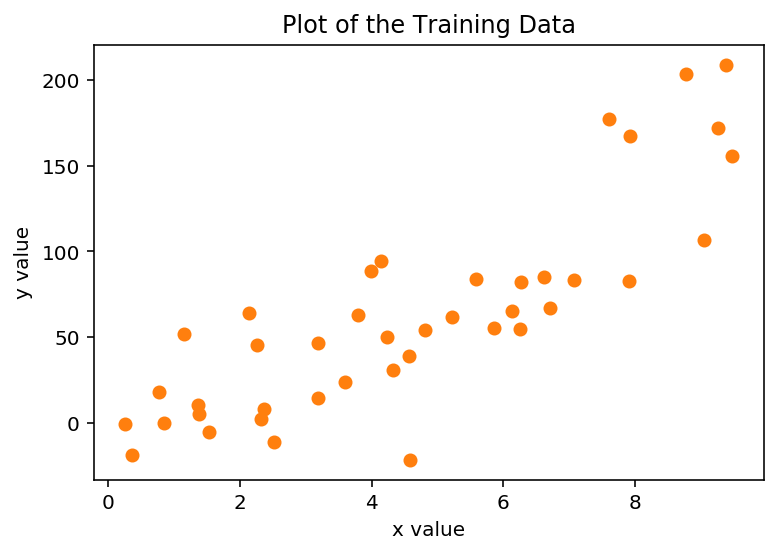

In [337]:
import matplotlib.pyplot as plt
# (a) Create a scatter plot of your training data.
plt.scatter(x_tr,y_tr)
plt.xlabel("x value")
plt.ylabel("y value")
plt.title("Plot of the Training Data")
plt.show()

Coefficients: 
 [ 18.30320685]
Intercept: 
 -21.7307829291
y = -21.73 + 18.30 x
Mean squared error of test data: 2023.31
Mean squared error of training data: 1052.59
R-square value of test data: 0.56
R-square value of training data: 0.70


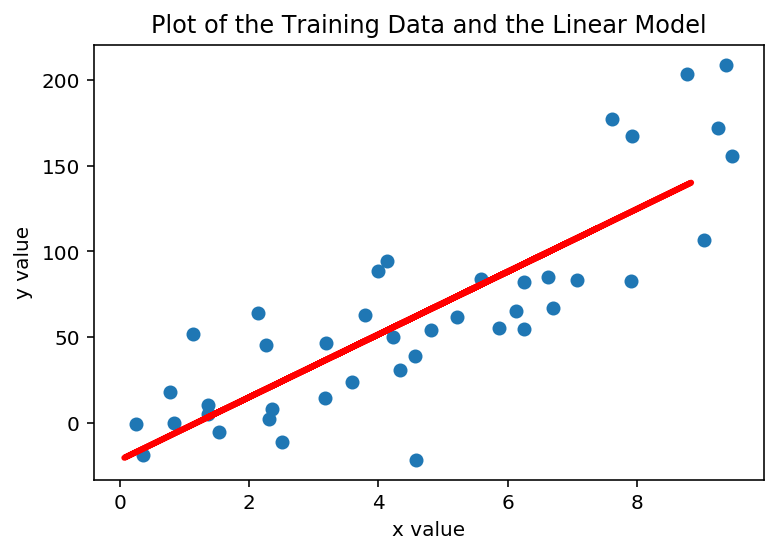

In [395]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#  (b) Estimate a linear regression model ( y=a0+a1x) for the training data and calculate both the  R2
#   value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g.  y=a0+a1x
#  , but with the estimated coefficients inserted.


# Create linear regression object
regr = linear_model.LinearRegression()
x_train = np.asarray(x_tr)
y_train = np.asarray(y_tr)
x_test = np.asarray(x_te)
y_test = np.asarray(y_te)
# Train the model using the training sets
regr.fit(x_train.reshape(-1,1), y_train)

# Make predictions using the testing set
y_hat_test = regr.predict(x_test.reshape(-1,1))
y_hat_train = regr.predict(x_train.reshape(-1,1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)
print('y = %.2f + %.2f x' % (regr.intercept_ ,regr.coef_))
# The mean squared error
print("Mean squared error of test data: %.2f" % mean_squared_error(y_test, y_hat_test))
print("Mean squared error of training data: %.2f" % mean_squared_error(y_train, y_hat_train))
# R^2 value
print('R-square value of test data: %.2f' % r2_score(y_test, y_hat_test))
print('R-square value of training data: %.2f' % r2_score(y_train, y_hat_train))
plt.scatter(x_train,y_train)
plt.xlabel("x value")
plt.ylabel("y value")
plt.title("Plot of the Training Data and the Linear Model")
plt.plot(x_test, y_hat, color='red', linewidth=3)
plt.show()
# print(x_train.reshape(-1,1))

**Model 1 training dataset:**


The  $R^2$:  0.70

The mean square error: 1052.59

Coefficients: 
 [ 0.47100686  1.83208191]
Intercept: 
 8.00733746159
y = 8.01 + 0.47 x + 1.83 x^2
Mean squared error of training data: 884.81
Mean squared error of test data: 1400.81
R-square value of training data: 0.75
R-square value of test data: 0.69


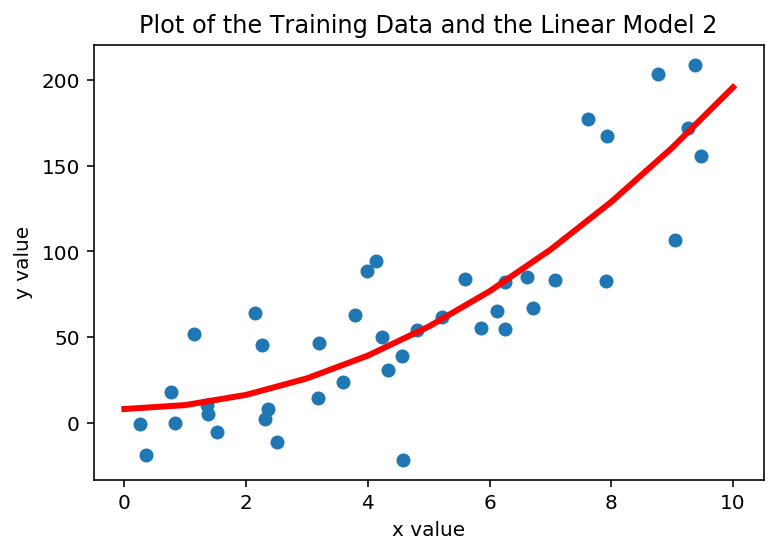

In [394]:
#(c) choose a transformation of the predictor variable, x that may make sense for these data.
# From looking at the scatter plot of the training data, I would like to choose my predictors to be  x1=x
#  and  x2=x^2

x2 = x_train**2
x2 = np.asarray(x2)
X = np.concatenate((x_train,x2),axis=0)
X = X.reshape(2,len(x2))


# x2_te = x_test**2
# x2_te = np.asarray(x2)
# X_te = np.concatenate((x_te,x2_te),axis=0)
# X_te = X_te.reshape(2,25)

# Create linear regression object
regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X.T, y_train)

# The coefficients
print('Coefficients: \n', regr2.coef_)
# The intercept
print('Intercept: \n', regr2.intercept_)

# Make predictions using the testing set
y_hat_test = 8.0 + 0.47*x_test + 1.83*x_test**2 #regr2.predict(X_te.T)
y_hat_train = 8.0 + 0.47*x_train + 1.83*x_train**2
print('y = %.2f + %.2f x + %.2f x^2' % (regr2.intercept_ ,regr2.coef_[0],regr2.coef_[1]))

# print(y_hat)
# print(y_test)
# The mean squared error
print("Mean squared error of training data: %.2f" % mean_squared_error(y_train, y_hat_train))
print("Mean squared error of test data: %.2f" % mean_squared_error(y_test, y_hat_test))

# R^2 value
print('R-square value of training data: %.2f' % r2_score(y_train, y_hat_train))
print('R-square value of test data: %.2f' % r2_score(y_test, y_hat_test))
plt.scatter(x_train,y_train)
plt.xlabel("x value")
plt.ylabel("y value")
plt.title("Plot of the Training Data and the Linear Model 2")
ar = np.arange(int(x_train.max())+2)
ar_hat = 8.0 + 0.47*ar + 1.83*ar**2 
plt.plot(ar,ar_hat, color='red', linewidth=3)
plt.show()

**Model 2 training dataset:**


The  $R^2$: 0.75

The mean square error: 884.81

(d)
Using both of the models you created here in (b) and (c), 
plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line). 

This part is shown in two plots above.


(e) Using the models above, apply them to the test data and estimate the  R2 and mean square error of the test dataset.
  
**Model 1 test dataset:**


The  $R^2$:  0.56

The mean square error: 2023.31

  
**Model 2 test dataset:**


The  $R^2$: 0.69

The mean square error: 1400.81

(f) Which models perform better on the training data, and which on the test data? Why?

On both the training data and the test data, model 2 performs better. I think this is because the linearity between the responsor and predictor is not very high, therefore a more flexible would have a better performance and fit the data better.

(g) Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

The predictive capability would be negatively influenced, i.e. our model would be very inaccurate. 
The reason is that the model might fit training data perfectly, but if training data and test data are distinctively different, then we can not guarantee that the model still fit the testing data. 